In [143]:
import pandas as pd 
import kagglehub 
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [144]:
import shutil
import os

path = kagglehub.dataset_download("kartikeybartwal/ecommerce-product-recommendation-collaborative")

os.makedirs('data', exist_ok=True)

for filename in os.listdir(path):
    src_file = os.path.join(path, filename)
    dst_file = os.path.join('data', filename)
    if os.path.isfile(src_file):
        shutil.copy(src_file, dst_file)

print("Files have been copied to /data")

Files have been copied to /data


In [145]:
df = pd.read_csv("data/user_personalized_features.csv")
df.head(10)

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
5,5,#6,38,Male,Suburban,25926,Travel,22,8,25,2669,Books,520,28,False
6,6,#7,56,Male,Urban,124555,Fashion,11,7,152,1113,Home & Kitchen,330,31,True
7,7,#8,36,Male,Urban,29496,Technology,26,7,108,2151,Apparel,558,19,True
8,8,#9,40,Male,Rural,76447,Travel,25,6,130,4085,Books,325,3,True
9,9,#10,28,Male,Urban,121604,Food,13,8,61,4999,Electronics,114,36,False


In [146]:
if 'Unnamed: 0' in df.columns:
	df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head(10)

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
5,#6,38,Male,Suburban,25926,Travel,22,8,25,2669,Books,520,28,False
6,#7,56,Male,Urban,124555,Fashion,11,7,152,1113,Home & Kitchen,330,31,True
7,#8,36,Male,Urban,29496,Technology,26,7,108,2151,Apparel,558,19,True
8,#9,40,Male,Rural,76447,Travel,25,6,130,4085,Books,325,3,True
9,#10,28,Male,Urban,121604,Food,13,8,61,4999,Electronics,114,36,False


In [147]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

cat_columns = df.select_dtypes(include=['object', 'bool']).columns

for col in cat_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

df.head(10)

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,56,1,1,38037,2,5,7,18,2546,1,584,38,1
1,112,46,0,0,103986,3,15,7,118,320,2,432,40,0
2,223,32,0,1,101942,2,28,1,146,3766,0,306,1,1
3,334,60,0,1,71612,0,18,3,163,4377,0,527,29,0
4,445,25,1,1,49725,4,2,5,141,4502,3,53,10,1
5,556,38,1,1,25926,4,22,8,25,2669,1,520,28,0
6,667,56,1,2,124555,0,11,7,152,1113,4,330,31,1
7,778,36,1,2,29496,3,26,7,108,2151,0,558,19,1
8,889,40,1,0,76447,4,25,6,130,4085,1,325,3,1
9,1,28,1,2,121604,1,13,8,61,4999,2,114,36,0


<h1> Adding features for dataset </h1>
<h2> Dataset did not include purchase history </h2>

The average rate of purchase is 1 - 3% globally


In [148]:
np.random.seed(42)

df['Purchased'] = np.random.choice([0, 1], size=len(df), p=[0.60, 0.40])
df['Purchase Quantity'] = np.random.randint(1, 5, size=len(df)) * df['Purchased']
df['Customer'] = np.random.choice(['Returning', 'New'], size=len(df), p=[0.42, 0.58])
df['Customer'] = LabelEncoder().fit_transform(df['Customer'])

df['Product Purchased'] = np.random.choice(['Product A', 'Product B', 'Product C', 'Product D'], size=len(df), p=[0.34, 0.21, 0.17, 0.28])

df.head(20)

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription,Purchased,Purchase Quantity,Customer,Product Purchased
0,0,56,1,1,38037,2,5,7,18,2546,1,584,38,1,0,0,0,Product D
1,112,46,0,0,103986,3,15,7,118,320,2,432,40,0,1,4,0,Product D
2,223,32,0,1,101942,2,28,1,146,3766,0,306,1,1,1,2,1,Product C
3,334,60,0,1,71612,0,18,3,163,4377,0,527,29,0,0,0,1,Product D
4,445,25,1,1,49725,4,2,5,141,4502,3,53,10,1,0,0,1,Product A
5,556,38,1,1,25926,4,22,8,25,2669,1,520,28,0,0,0,1,Product A
6,667,56,1,2,124555,0,11,7,152,1113,4,330,31,1,0,0,0,Product D
7,778,36,1,2,29496,3,26,7,108,2151,0,558,19,1,1,3,0,Product B
8,889,40,1,0,76447,4,25,6,130,4085,1,325,3,1,1,1,0,Product D
9,1,28,1,2,121604,1,13,8,61,4999,2,114,36,0,1,1,0,Product D


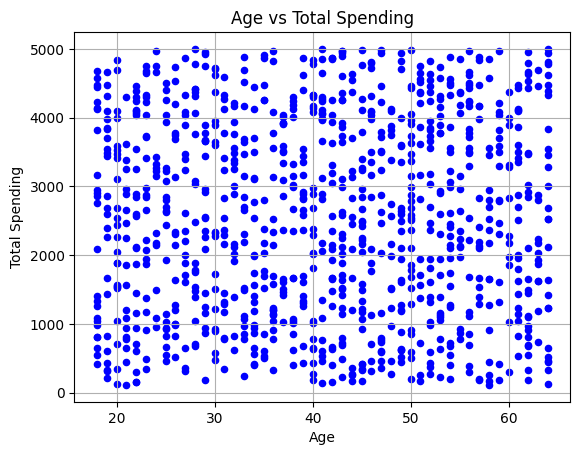

In [149]:
df.plot(kind='scatter', x='Age', y='Total_Spending', title='Age vs Total Spending',
               color = 'blue', marker = 'o')

plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()



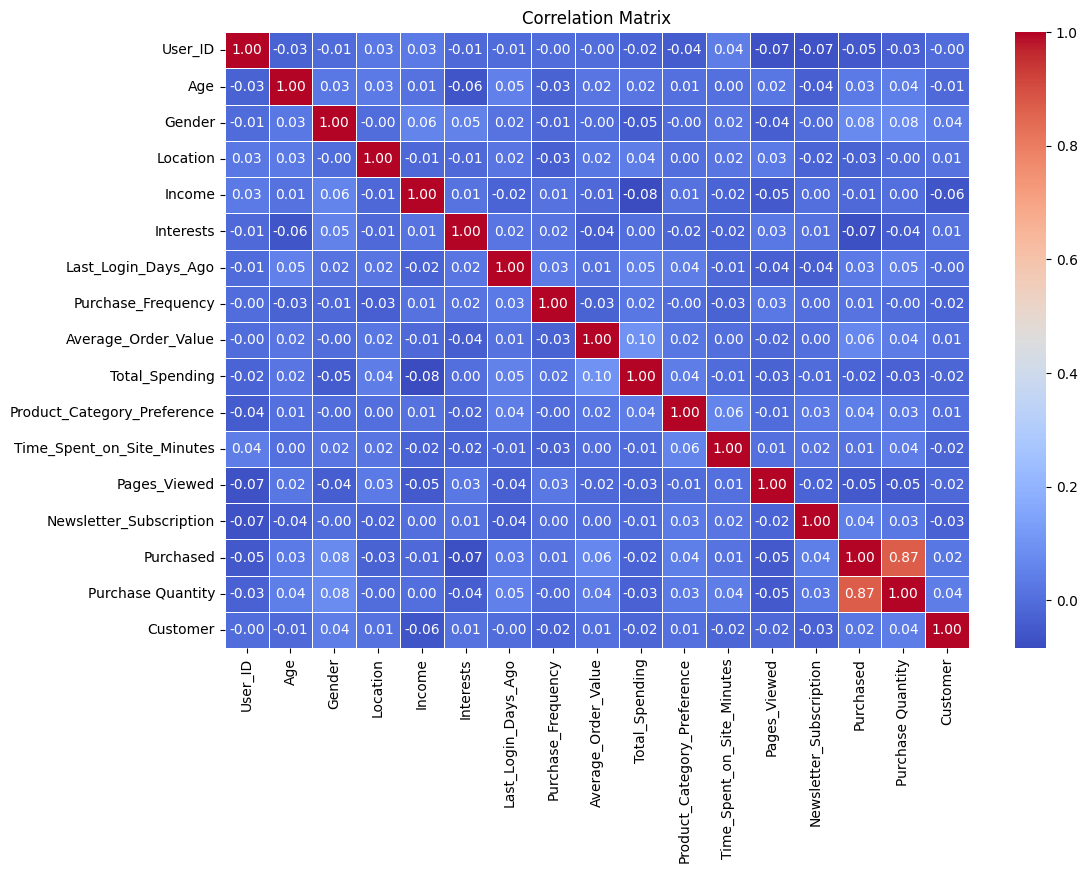

In [150]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[num_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [151]:
features = ['Age', 'Gender', 'Location', 'Income',
            'Interests', 'Last_Login_Days_Ago', 'Product_Category_Preference',
            'Pages_Viewed', 'Newsletter_Subscription', 'Purchase Quantity',
            'Customer']

X = df[features]
y = df['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=0.1, random_state=42)
svm.fit(X_train, y_train)

,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [152]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        72

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<h1> OVERFITTED </h1>

In [153]:
features = ['Age', 'Gender', 'Income', 
            'Interests', 'Last_Login_Days_Ago', 'Product_Category_Preference',
            'Newsletter_Subscription',
            'Customer']

X = df[features]
y = df['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=0.06, random_state=42)
svm.fit(X_train, y_train)

,C,0.06
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       128
           1       0.00      0.00      0.00        72

    accuracy                           0.64       200
   macro avg       0.32      0.50      0.39       200
weighted avg       0.41      0.64      0.50       200



c:\Users\PCM\ecommerce_recommendation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PCM\ecommerce_recommendation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PCM\ecommerce_recommendation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

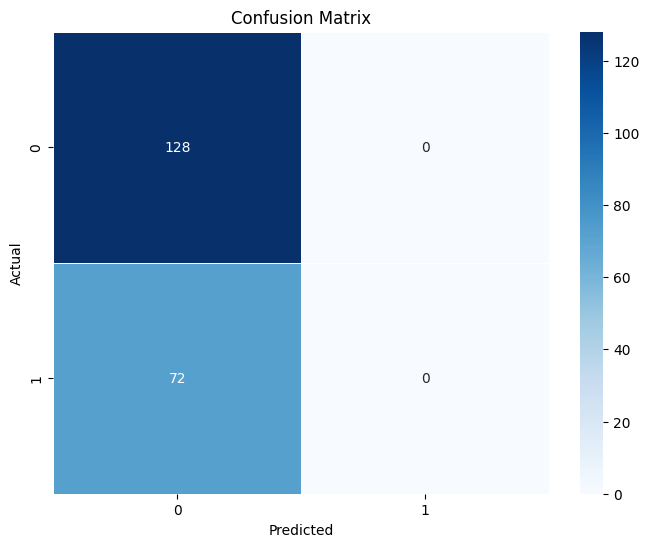

In [154]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

rp = classification_report(y_test, y_pred)
print("Classification Report:\n", rp)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h1> TRYING KMEAN </h1>

<h2> Choosing K </h2>

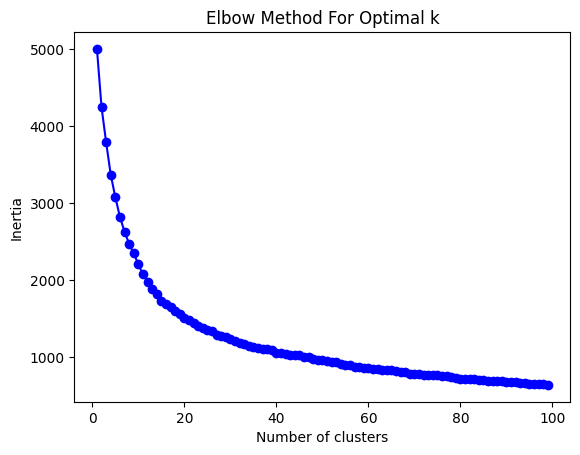

In [155]:
from sklearn.cluster import KMeans

cluster_features = ['Age', 'Income', 'Interests', 'Last_Login_Days_Ago', 'Product_Category_Preference']

scaler = StandardScaler()
X_cluster = scaler.fit_transform(df[cluster_features])

inertia = []
K = range(1, 100)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


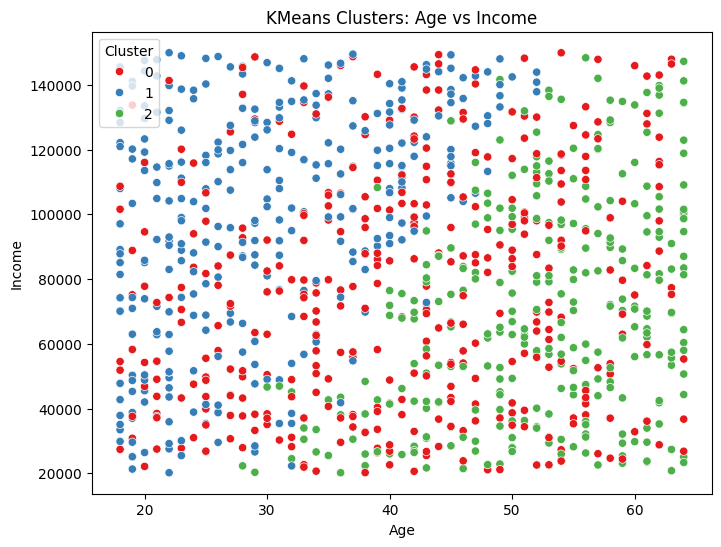

In [156]:
from sklearn.cluster import KMeans

# Select features for clustering (you can adjust as needed)
cluster_features = ['Age', 'Income', 'Interests', 'Last_Login_Days_Ago', 'Product_Category_Preference']

# Scale features
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df[cluster_features])

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=df, palette='Set1')
plt.title('KMeans Clusters: Age vs Income')
plt.show()

In [157]:
for cluster in df['Cluster'].unique():
    cluster_users = df[df['Cluster'] == cluster]
    top_products = cluster_users['Product Purchased'].value_counts().head(3)
    print(f"Recommended products for Cluster {cluster}:")
    print(top_products)
    print("-" * 30)

Recommended products for Cluster 0:
Product Purchased
Product A    126
Product D     97
Product B     77
Name: count, dtype: int64
------------------------------
Recommended products for Cluster 1:
Product Purchased
Product A    114
Product D     82
Product C     62
Name: count, dtype: int64
------------------------------
Recommended products for Cluster 2:
Product Purchased
Product A    101
Product D     99
Product B     60
Name: count, dtype: int64
------------------------------


In [158]:
cluster_recommendations = {}
for cluster in df['Cluster'].unique():
    cluster_users = df[df['Cluster'] == cluster]
    top_products = cluster_users['Product Purchased'].value_counts().head(3)
    cluster_recommendations[cluster] = set(top_products.index)

hits = 0
total = 0
for idx, row in df.iterrows():
    cluster = row['Cluster']
    actual_product = row['Product Purchased']
    if actual_product in cluster_recommendations[cluster]:
        hits += 1
    total += 1

hit_rate = hits / total
print(f"Top-3 Recommendation Hit Rate: {hit_rate:.2%}")

Top-3 Recommendation Hit Rate: 81.80%


In [159]:
print(df['Cluster'].value_counts())

Cluster
0    374
1    317
2    309
Name: count, dtype: int64
